In [2]:
import requests
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# URL of the netCDF file
url = 'https://dapds00.nci.org.au/thredds/ncss/ub8/au/OzWALD/8day/Ssoil/OzWALD.Ssoil.2020.nc?north=-34.350050&west=148.427637&east=148.543866&south=-34.479314&disableProjSubset=on&horizStride=1&time_start=2020-01-01T00%3A00%3A00Z&time_end=2020-12-26T00%3A00%3A00Z&timeStride=1'

# Download the file
response = requests.get(url)


In [5]:
# ds = xr.open_dataset(response.content)

In [6]:
filename = 'OzWALD.Ssoil.2020.nc'

# Save the file locally
with open(filename, 'wb') as f:
    f.write(response.content)



In [7]:
# Load the dataset using xarray
ds = xr.open_dataset(filename)

ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy', 'rasterio']. Consider explicitly selecting one of the installed engines via the ``engine`` parameter, or installing additional IO dependencies, see:
https://docs.xarray.dev/en/stable/getting-started-guide/installing.html
https://docs.xarray.dev/en/stable/user-guide/io.html

In [4]:
file_path = "Milgdarra_Ssoil_OzWALD.Ssoil.2020.nc"
ds = xr.open_dataset(file_path)

In [5]:
ds

<xarray.Dataset> Size: 115kB
Dimensions:    (time: 46, longitude: 24, latitude: 26)
Coordinates:
  * time       (time) datetime64[ns] 368B 2020-01-01 2020-01-09 ... 2020-12-26
  * latitude   (latitude) float32 104B -34.35 -34.36 -34.36 ... -34.47 -34.48
  * longitude  (longitude) float32 96B 148.4 148.4 148.4 ... 148.5 148.5 148.5
Data variables:
    Ssoil      (time, longitude, latitude) float32 115kB ...
Attributes: (12/13)
    creator_name:        ANU Centre for Water and Landscape Dynamics
    creator_url:         http://wald.anu.edu.au
    creator_email:       albert.vandijk@anu.edu.au
    institution:         Australian National University
    date_created:        03-Mar-2021
    description:         This product was derived by the ANU OzWALD model-dat...
    ...                  ...
    Conventions:         CF-1.0
    History:             Translated to CF-1.0 Conventions by Netcdf-Java CDM ...
    geospatial_lat_min:  -34.477500915527344
    geospatial_lat_max:  -34.352500915527344
    geospatial_lon_min:  148.42750549316406
    geospatial_lon_max:  148.54249572753906

In [6]:
soil_moisture = ds['Ssoil']
time = ds['time']
lat = ds['latitude']
lon = ds['longitude']

In [9]:
time_index = 0  
soil_moisture_at_time = soil_moisture.isel(time=time_index)

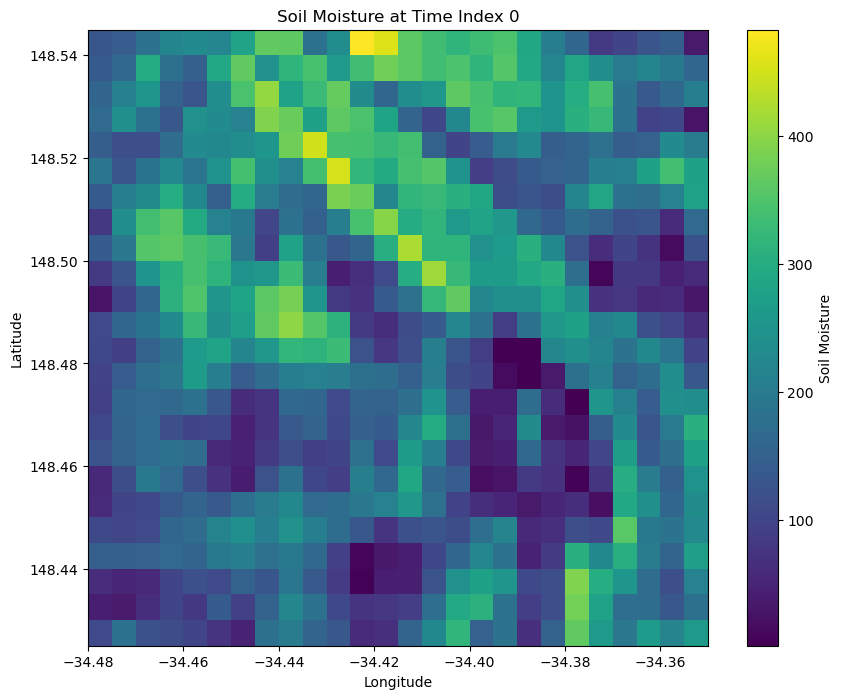

In [16]:
# Plot the 2D map of soil moisture at the selected timepoint
plt.figure(figsize=(10, 8))
plt.pcolormesh(lat, lon, soil_moisture_at_time, shading='nearest')
plt.colorbar(label='Soil Moisture')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Soil Moisture at Time Index {time_index}')
plt.show()

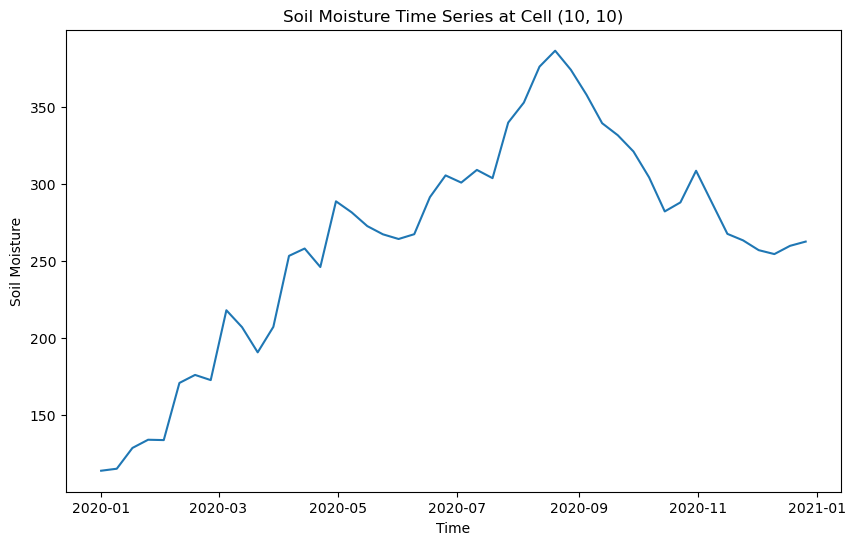

In [14]:
# Select a specific cell (e.g., at index [10, 10])
lat_index = 10
lon_index = 10
soil_moisture_at_cell = soil_moisture[:, lat_index, lon_index]

# Plot the time series of soil moisture at the selected cell
plt.figure(figsize=(10, 6))
plt.plot(time, soil_moisture_at_cell)
plt.xlabel('Time')
plt.ylabel('Soil Moisture')
plt.title(f'Soil Moisture Time Series at Cell ({lat_index}, {lon_index})')
plt.show()